In [1]:
import numpy as np, analysis as ana, prjlib, basic
from matplotlib.pyplot import *

In [2]:
Lmin=20
mb, mb0, mb1 = prjlib.binning_all(10,lmin=Lmin,Lsp=2048)
p, __ = prjlib.filename_init(PSA='s14&15_cross',stype='lcmb',doreal='True',rlmin='200')
ocl = (np.loadtxt(p.quad.f['EB'].ocls)).T[1]
ocb = prjlib.binning(ocl,mb0,mb1)
scl = np.array([np.loadtxt(p.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,201)])
scb = prjlib.binning(scl,mb0,mb1)
mcb = np.mean(scb,axis=0)
vcb = np.std(scb,axis=0)

In [3]:
# amplitude estimate
st = ana.statistics(ocb,scb)
ana.statistics.x1PTE(st)
ana.statistics.x2PTE(st)
#ana.statistics.x2PTE(st,diag=True)
print(np.around(st.ox1,decimals=1), np.around(st.px1,decimals=3), np.around(st.ox2,decimals=1), np.around(st.px2,decimals=3))

0.6 0.58 7.4 0.7


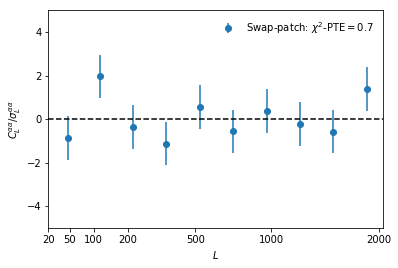

In [4]:
xlim(np.sqrt(20),np.sqrt(2048))
ylim(-5,5)
xlabel('$L$')
ylabel(r'$C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$')
Label = r'Swap-patch: $\chi^2$-PTE$='+str(np.around(st.px2,decimals=2))+'$'
errorbar(np.sqrt(mb.bc),(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=Label)
xs = np.array([20,50,100,200,500,1000,2000])
xticks(np.sqrt(xs),xs)
axhline(0,ls='--',color='k')
legend(loc=0,frameon=False)
savefig('fig_cross.png')

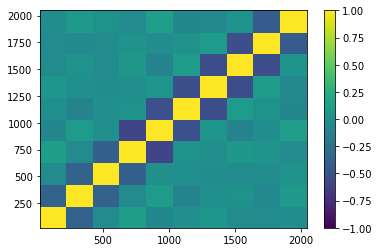

In [5]:
cor = ana.get_corrcoef(scb)
x = np.linspace(Lmin,2048,11)
pcolor(x,x,cor,vmin=-1,vmax=1)
cb = colorbar()
cb.set_label('',labelpad=20,rotation=270)